In [304]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('../data/cleaned.csv')

0        2875 days 12:55:00
1        2875 days 13:19:00
2        2876 days 09:41:00
3        2876 days 09:46:00
4        2876 days 11:20:00
                ...        
79620    2647 days 06:43:00
79621    4449 days 18:47:00
79622     937 days 06:14:00
79623    1496 days 18:55:00
79624    4268 days 04:12:00
Name: since_last_pin, Length: 79625, dtype: object

In [301]:
df['card_age_days'] = df['card_age'].apply(lambda val : int(val.split(' days ')[0]))
df['since_last_pin_days'] = df['since_last_pin_days'].apply(lambda val : int(val.split(' days ')[0]))

X = df[[
#    'user_id',
    'card_method',
    'mcc_group',
#    'is_retired',
    'log_amount',
#    'card_limit',
#    'card_type',
#    'user_age',
#    'user_gender',
#    'user_rating',
    'user_number_of_cards',
    'city_match',
    'state_match',
    'error_count',
    'is_card_expired',
    'since_last_pin'
]]


X = pd.get_dummies(X)

y = df['flagged_as_fraud']

In [302]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20)

In [303]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

model = LogisticRegression().fit(xtrain,ytrain)


MemoryError: Unable to allocate 37.5 GiB for an array with shape (78925, 63700) and data type object

In [ ]:
test_prediction = model.predict(xtest)

print('Accuracy Score: ', accuracy_score(ytest, test_prediction))

Accuracy Score:  0.8707692307692307


In [ ]:
print('Confusion Matrix:')
print(confusion_matrix(ytest, test_prediction))

Confusion Matrix:
[[10081  1017]
 [ 1041  3786]]


<AxesSubplot:ylabel='feature'>

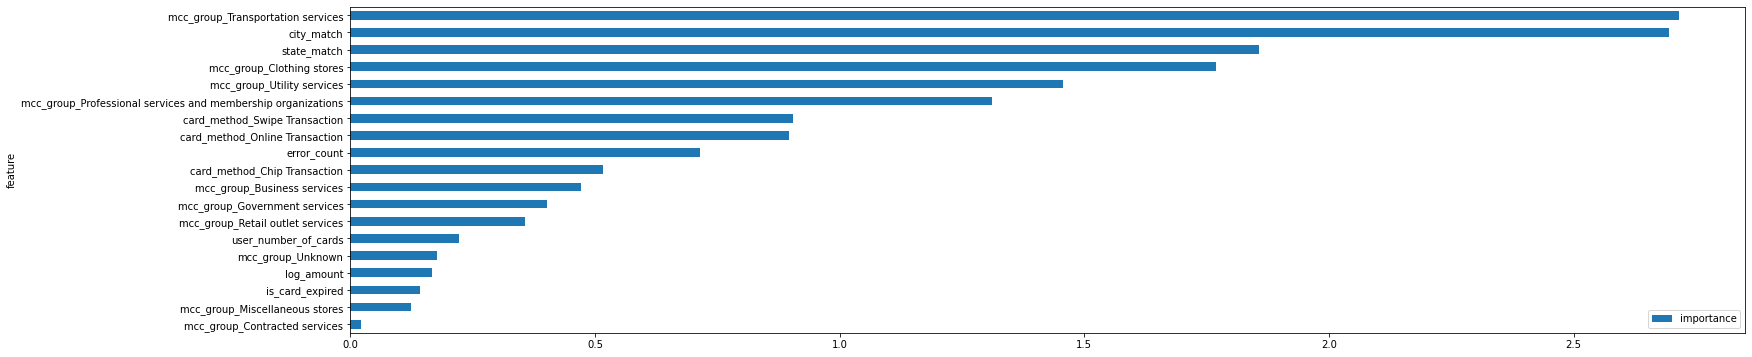

In [ ]:
# Assessing importance
N_TOP_FEATURES = 25

feature_importance = pd.DataFrame({'feature': X.columns, 'importance': np.abs(model.coef_[0])})
feature_importance = feature_importance.sort_values('importance', ascending=True).tail(N_TOP_FEATURES)
feature_importance.plot(x='feature', y='importance', kind='barh', figsize=(N_TOP_FEATURES, 6))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_classifier = RandomForestClassifier(
    n_estimators=200, 
    max_features='auto', 
    min_samples_leaf=10
).fit(xtrain, ytrain)

ypred = rf_classifier.predict(xtest)

accuracy = accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(ytest, ypred))

Accuracy: 0.8950078492935636

Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.93      0.93     11098
        True       0.83      0.82      0.82      4827

    accuracy                           0.90     15925
   macro avg       0.88      0.87      0.87     15925
weighted avg       0.89      0.90      0.89     15925

